In [1]:
#tratamiento de datos
import pandas as pd

#configuracion de visualizacion
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

#exploracion de archivos
import sys
sys.path.append('../')

#funciones personalizadas
from SRC import sp_eda as se
from SRC import sp_limpieza as sl
from SRC import sp_nulos as sn
from SRC import sp_visualizaciones as sv

#visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'review_creation_date']

df = pd.read_csv('../datos/df_data_no_nulos.csv', parse_dates=date_cols)
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# ANALISIS

## DISTRIBUCION DE COLUMNAS CATEGORICAS

### VISUALIZACION DE FRECUENCIAS

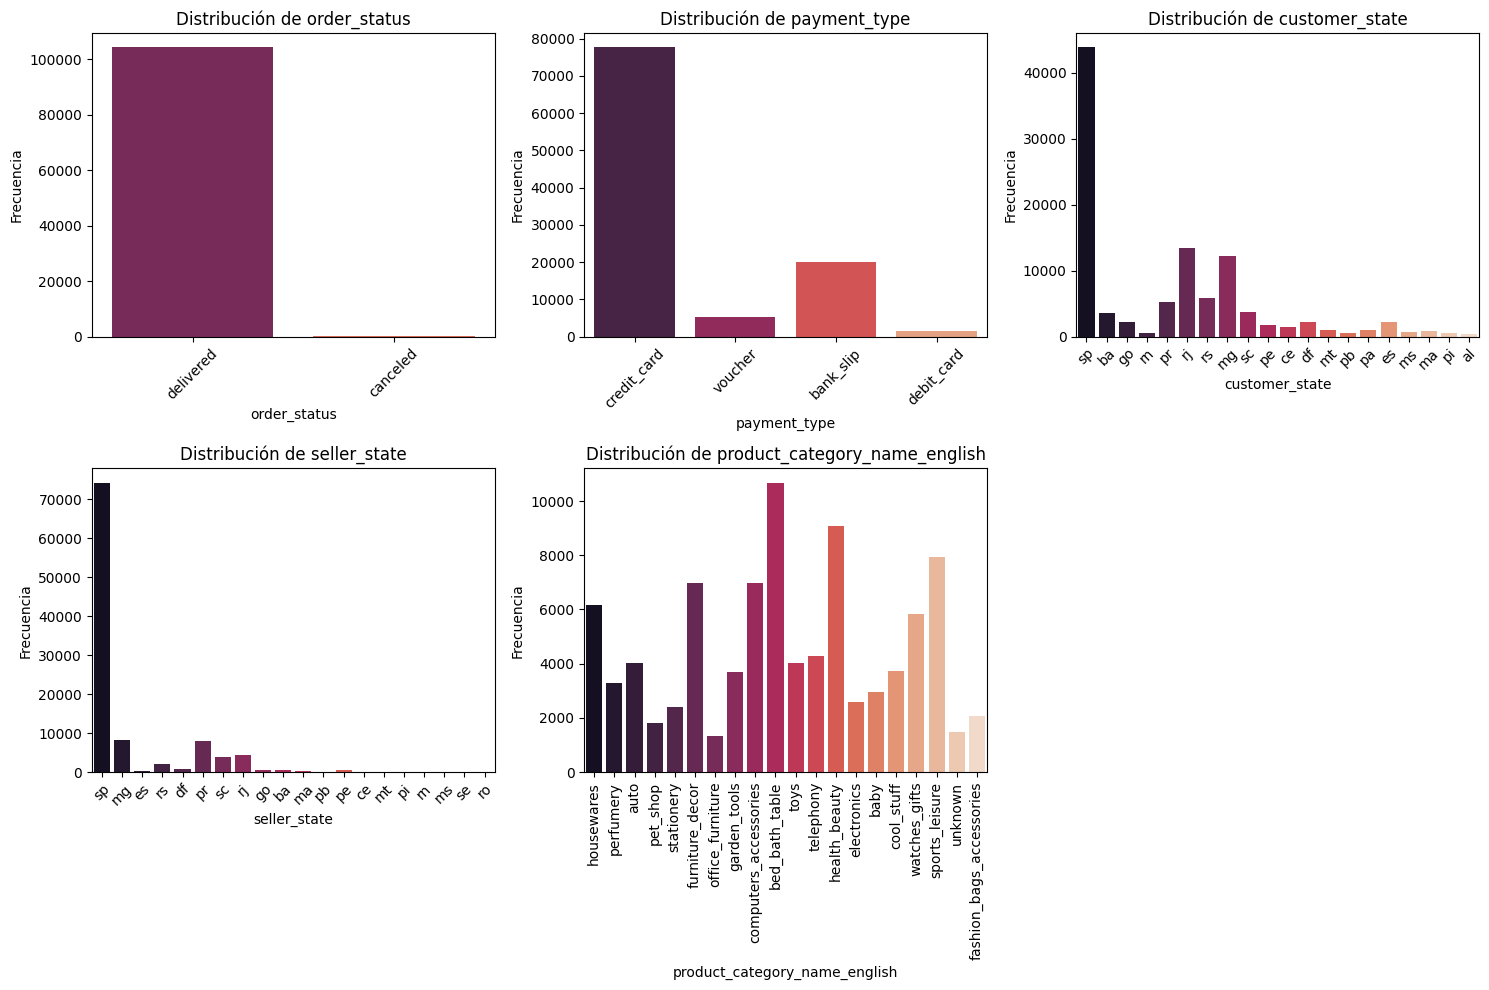

In [3]:
sv.subplot_col_cat(df,['order_id', 'customer_id', 'product_id', 'seller_id', 'review_id'])

### CALCULO DE FRECUENCIAS

In [4]:
sn.estadist_col_cat(df)

ORDER_STATUS
order_status
delivered    99.993285
canceled      0.006715
Name: count, dtype: float64
------------------------
PAYMENT_TYPE
payment_type
credit_card    74.487496
bank_slip      19.092889
voucher         4.934624
debit_card      1.484992
Name: count, dtype: float64
------------------------
CUSTOMER_STATE
customer_state
sp    42.046948
rj    12.910219
mg    11.739877
rs     5.536103
pr     5.045902
sc     3.631899
ba     3.422772
df     2.142110
es     2.060570
go     2.045221
pe     1.628886
ce     1.317115
pa     0.968890
mt     0.914210
ma     0.732903
ms     0.722351
pb     0.537206
rn     0.496916
pi     0.493079
al     0.404823
se     0.332876
to     0.282993
ro     0.250377
am     0.147732
ac     0.080581
ap     0.068110
rr     0.039331
Name: count, dtype: float64
------------------------
SELLER_STATE
seller_state
sp    71.138590
mg     7.960247
pr     7.684928
rj     4.231459
sc     3.664515
rs     1.974233
df     0.812525
ba     0.557352
go     0.471974
pe     0.40


* En cuanto al estado de los pedidos, el 99,99% aparece como delivered (104.236 pedidos), mientras que solo 7 registros figuran como canceled (0,01%).   
  Todo indica que se trata de devoluciones tras la entrega. Este dato refleja una logística extremadamente sólida, con prácticamente todas las operaciones completadas con éxito.

* Sobre los métodos de pago, destaca claramente la tarjeta de crédito, que concentra el 74,49% de las transacciones. Le sigue el boleto bancário con el 
  19,09%, una alternativa habitual para clientes sin tarjeta. Los vouchers (4,93%) y la tarjeta de débito (1,48%) apenas participan, ya que los primeros suelen ser promociones y los segundos no permiten financiación.

* A nivel geográfico, los clientes se concentran en São Paulo (42,05%), Rio de Janeiro (12,91%) y Minas Gerais (11,74%). Estos tres estados representan 
  casi el 67% del total, reflejando el mapa demográfico y económico del país. En contraste, estados como Roraima (0,04%), Amapá (0,07%) y Acre (0,08%) muestran participación mínima, lo que supone desafíos logísticos y también oportunidades de expansión.

* Entre los vendedores la concentración es aún mayor: São Paulo reúne el 71,14% del total y actúa como principal hub comercial. Le siguen Minas Gerais (7,
  96%), Paraná (7,68%) y Rio de Janeiro (4,23%). La presencia casi simbólica de Acre, Amapá o Roraima explica parcialmente los mayores tiempos de entrega y la menor satisfacción en esas regiones.

* En cuanto a categorías de producto, el catálogo resulta muy variado. La categoría con mayor peso es bed_bath_table (10,2%), seguida por health_beauty 
  (8,7%) y sports_leisure (7,6%). Productos tecnológicos como computers_accessories o furniture_decor también tienen una presencia notable (6,7%). Las cinco primeras categorías suponen el 39,9% del total, por lo que ninguna domina el mercado. Curiosamente, algunas categorías pequeñas como CDs o ropa infantil muestran niveles de satisfacción muy altos pese a su reducido volumen.

## DISTRIBUCION DE COLUMNAS NUMERICAS

### VISUALIZACION DE FRECUENCIAS

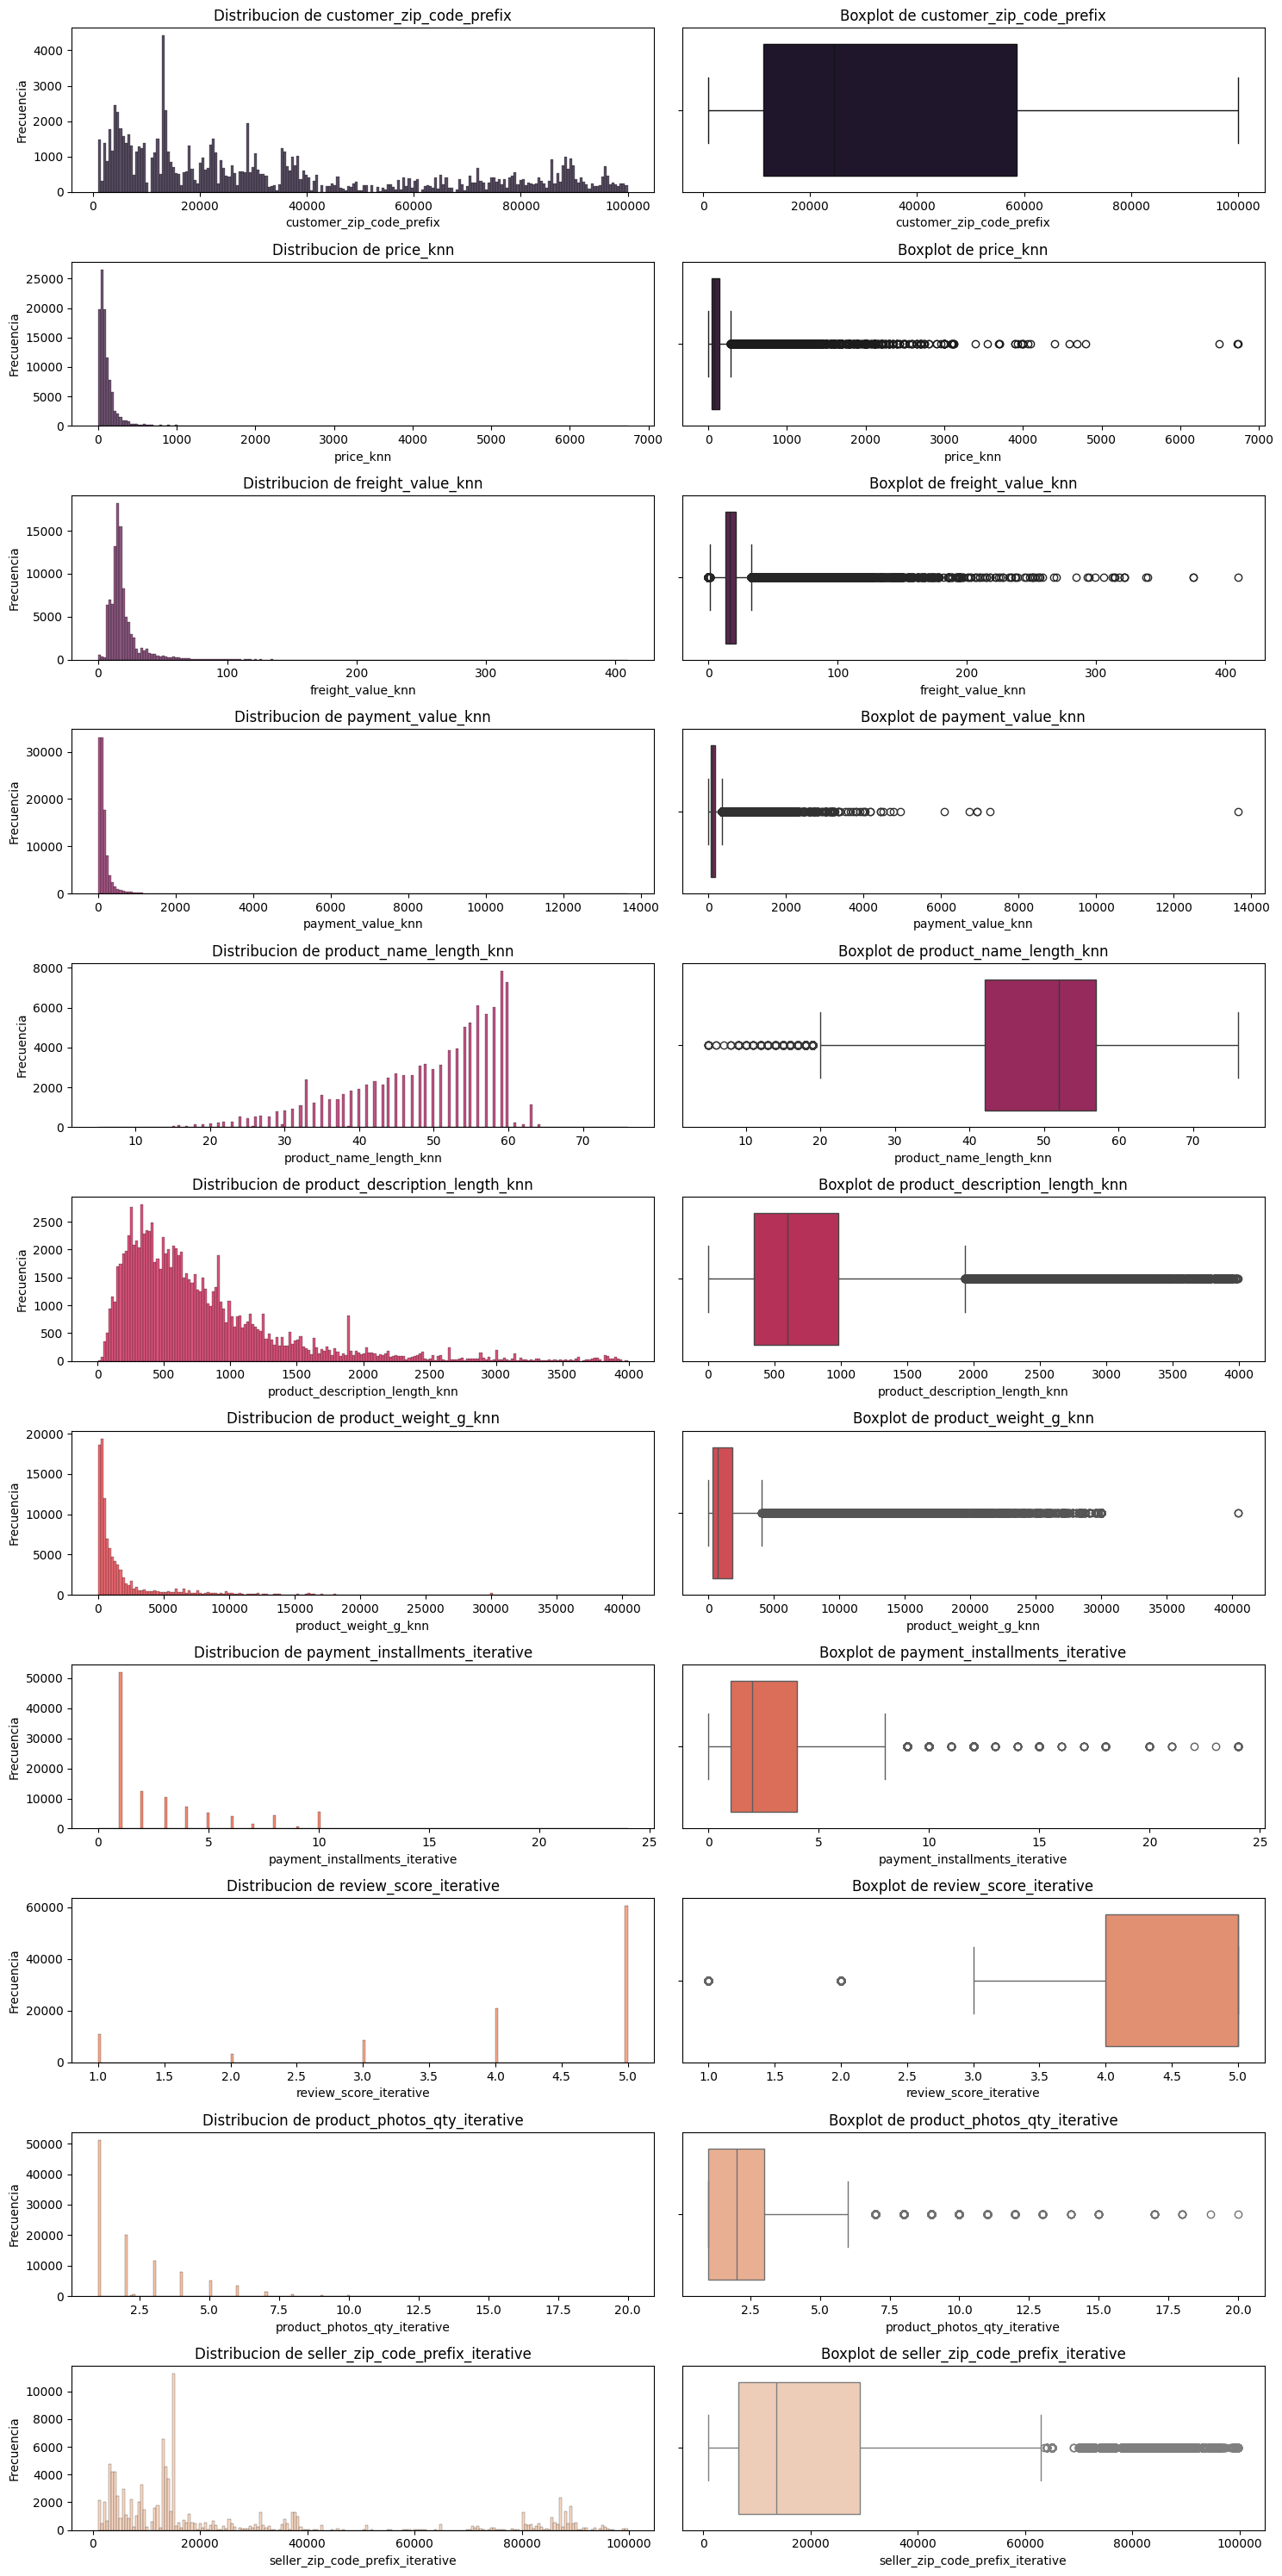

In [5]:
sv.subplot_col_num(df)

* El análisis de los histogramas y boxplots de las variables numéricas muestra patrones consistentes con la estructura del negocio de Olist.
  Los códigos postales de los clientes presentan dos concentraciones claras, principalmente en rangos bajos y medios, reflejando la fuerte presencia de compradores en la región sudeste.

* Los precios de los productos se concentran en valores bajos (entre R$0 y R$200), mientras que una cola larga de valores altos corresponde a artículos   
  premium. El costo de envío replica ese comportamiento: la mayoría de envíos cuestan entre R$10 y R$30, con valores altos asociados a regiones remotas o productos voluminosos. Como resultado, el valor total de pago muestra que la mayoría de compras oscilan entre R$50 y R$200, aunque existen transacciones que superan ampliamente los R$1.000.

* En cuanto a los textos, la longitud del nombre del producto se mantiene bastante estandarizada alrededor de los 50 caracteres, mientras que la  
  descripción presenta una variabilidad mucho mayor, desde textos breves de 300–500 caracteres hasta más de 2.000 en productos más complejos.

* El peso de los productos es una de las variables con mayor asimetría: la mediana es de apenas 700g, pero existen artículos que superan los 20kg,   
  generando outliers muy visibles. Esta dispersión ayuda a explicar la variabilidad observada en los costos logísticos.

* En términos de comportamiento del consumidor, la mayoría de compradores paga en 1 a 3 cuotas, aunque algunos financian en 10 o más cuando se trata de   
  compras costosas. El review score se concentra claramente en valores altos (4 y 5 estrellas), lo que confirma la buena percepción general del servicio.
  La cantidad de fotos por producto suele estar entre 1 y 3, siendo 2 la más frecuente, y el análisis de códigos postales de los vendedores muestra una fuerte concentración en el estado de São Paulo.

* En conjunto, estas distribuciones resaltan un negocio basado en productos accesibles, ligeros, con envíos económicos, y con una satisfacción del  
  cliente notablemente alta, aunque concentrado geográficamente.

### Medidas estadísticas

In [6]:
df.select_dtypes(include=['int64', 'float64']).describe().T

count          mean           std  \
customer_zip_code_prefix          104243.0  35096.911725  29795.291017   
price_knn                         104243.0    123.573958    188.200070   
freight_value_knn                 104243.0     20.085680     15.788493   
payment_value_knn                 104243.0    157.281586    217.373554   
product_name_length_knn           104243.0     48.847132      9.985797   
product_description_length_knn    104243.0    783.275529    646.121753   
product_weight_g_knn              104243.0   2094.701933   3758.518565   
payment_installments_iterative    104243.0      2.906833      2.729234   
review_score_iterative            104243.0      4.122157      1.308134   
product_photos_qty_iterative      104243.0      2.236931      1.727896   
seller_zip_code_prefix_iterative  104243.0  24582.533321  27639.119994   

                                      min       25%       50%       75%  \
customer_zip_code_prefix          1003.00  11325.00  24412.00  58657.50   
price_knn                            0.85     40.00     78.00    138.00   
freight_value_knn                    0.00     13.14     16.33     21.19   
payment_value_knn                    0.00     58.18    102.70    176.20   
product_name_length_knn              5.00     42.00     52.00     57.00   
product_description_length_knn       4.00    348.00    602.00    982.00   
product_weight_g_knn                 0.00    300.00    700.00   1800.00   
payment_installments_iterative       0.00      1.00      2.00      4.00   
review_score_iterative               1.00      4.00      5.00      5.00   
product_photos_qty_iterative         1.00      1.00      2.00      3.00   
seller_zip_code_prefix_iterative  1001.00   6506.00  13660.00  29156.00   

                                       max  
customer_zip_code_prefix          99980.00  
price_knn                          6735.00  
freight_value_knn                   409.68  
payment_value_knn                 13664.08  
product_name_length_knn              76.00  
product_description_length_knn     3992.00  
product_weight_g_knn              40425.00  
payment_installments_iterative       24.00  
review_score_iterative                5.00  
product_photos_qty_iterative         20.00  
seller_zip_code_prefix_iterative  99730.00

## Outliers

In [7]:
sn.calculo_outliers(df,df.select_dtypes(include=['int64', 'float64']).columns)

En la columna CUSTOMER_ZIP_CODE_PREFIX tenenemos un total de 0 outliers, lo que representa un 0.0% del total
En la columna PRICE_KNN tenenemos un total de 7746 outliers, lo que representa un 7.4307147722149205% del total
En la columna FREIGHT_VALUE_KNN tenenemos un total de 11297 outliers, lo que representa un 10.83717851558378% del total
En la columna PAYMENT_VALUE_KNN tenenemos un total de 7999 outliers, lo que representa un 7.673416920080965% del total
En la columna PRODUCT_NAME_LENGTH_KNN tenenemos un total de 687 outliers, lo que representa un 0.6590370576441583% del total
En la columna PRODUCT_DESCRIPTION_LENGTH_KNN tenenemos un total de 6456 outliers, lo que representa un 6.193221607206239% del total
En la columna PRODUCT_WEIGHT_G_KNN tenenemos un total de 14690 outliers, lo que representa un 14.092073328664753% del total
En la columna PAYMENT_INSTALLMENTS_ITERATIVE tenenemos un total de 6685 outliers, lo que representa un 6.412900626420958% del total
En la columna REVIEW_SCORE_

* El código postal de los clientes presenta una dispersión amplia, con valores entre 1.003 y 99.980. El promedio (35.097) y la mediana (24.412) reflejan  
  una mayor densidad en el sureste del país. La desviación estándar elevada confirma la heterogeneidad geográfica y los distintos retos logísticos.

* El precio de los productos tiene un promedio de R$123,57 y una mediana de R$78, lo que indica que la mayoría son artículos accesibles, aunque existen   
  valores extremos de hasta R$6.735. El costo de envío presenta un promedio de R$20,09 y una mediana de R$16,33, concentrándose en los valores bajos. El pago total, que combina precio y envío, muestra un promedio de R$157,28 y una mediana de R$102,70, dominado claramente por la influencia del precio del producto.

* La longitud de los nombres de producto tiene una media de 48,8 caracteres, mientras que la descripción presenta una alta variabilidad, con una media de 
  783 caracteres. El peso del producto es altamente asimétrico: promedio de 2.095g y mediana de 700g, indicando el predominio de artículos ligeros junto con algunos muy pesados. El número de cuotas tiene un promedio de 2,9 y mediana de 2, lo que confirma que la financiación es común, pero no excesiva. El review score promedio es 4,12, con mediana de 5, lo que evidencia un nivel de satisfacción elevado. El número de fotos tiene un promedio de 2,24, siendo habitual que los vendedores aporten al menos dos imágenes.

* En cuanto a outliers, destacan los del precio (7,4%), valor de envío (10,8%) y peso (14,1%), reflejando productos caros, envíos atípicos o artículos 
  muy pesados. También aparecen outliers en review score (13,6%), longitud de descripción (6,2%) y número de cuotas (6,4%), todos ellos casos extremos pero plausibles.

* La distribución del review score muestra que el 58,1% otorga 5 estrellas, el 20% 4 estrellas, el 10,4% 1 estrella, el 8,3% 3 estrellas y el 3,2% 2 
  estrellas. En general, la satisfacción es muy elevada.

## Matriz de correlación

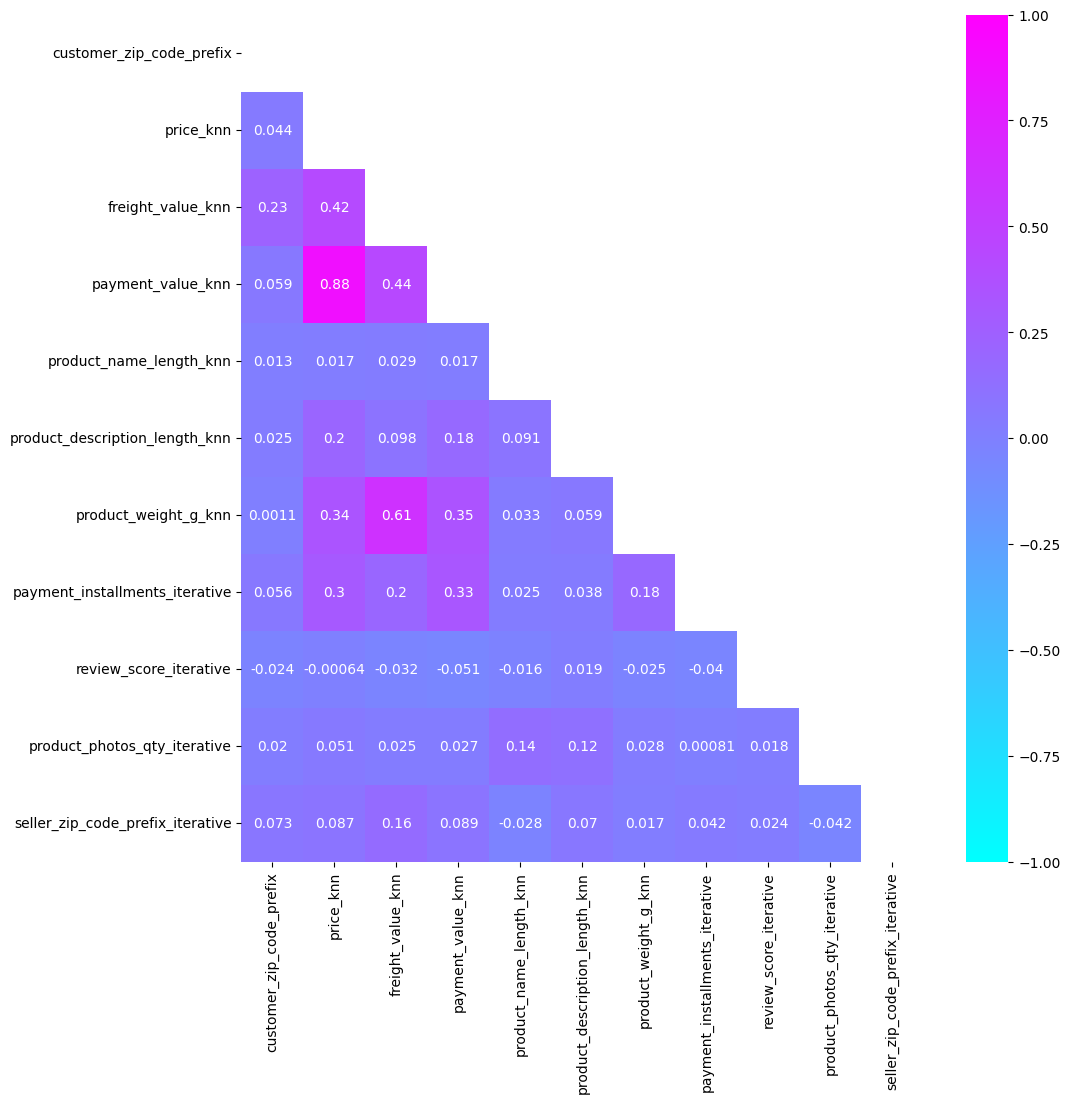

In [8]:
sv.matriz_correlacion(df)

* La matriz de correlación revela patrones esperados y otros interesantes. 

* La relación entre precio y valor del envío es de 0,42, mientras que con el valor total del pago alcanza 0,88, lo que confirma que el precio del 
  producto es la variable dominante.El peso correlaciona 0,61 con el valor del envío y 0,34 con el precio, mostrando el impacto logístico de los artículos pesados.

* El review score no presenta correlaciones importantes con el precio, el coste de envío, el número de cuotas o la cantidad de fotos, lo que indica que  
  la satisfacción no depende del coste ni de la financiación. Tampoco se relaciona con la longitud del nombre o la descripción del producto.

## Mapa geografico - ventas por estado

In [9]:
sv.mapa_coropletas_estado(df, columna_estado='customer_state',
                          columna_conteo='order_id',
                          columna_suma='payment_value_knn')

* El mapa geográfico refleja una fuerte concentración del comercio electrónico en el sudeste, especialmente en São Paulo, que destaca con la mayor 
  intensidad visual. Las regiones norte y nordeste aparecen con tonos más claros, señalando menor volumen de ventas. El sur y el centro-oeste muestran niveles intermedios, lo que apunta a mercados con potencial de desarrollo.

* La comparación entre ventas y review score revela que un mayor volumen no implica necesariamente mayor satisfacción. Este tipo de representación 
  resulta útil para identificar áreas estratégicas, optimizar la logística, detectar oportunidades de expansión y comunicar resultados a los distintos equipos y stakeholders de forma clara.

## Evolución temporal

### Total pedidos mensuales:

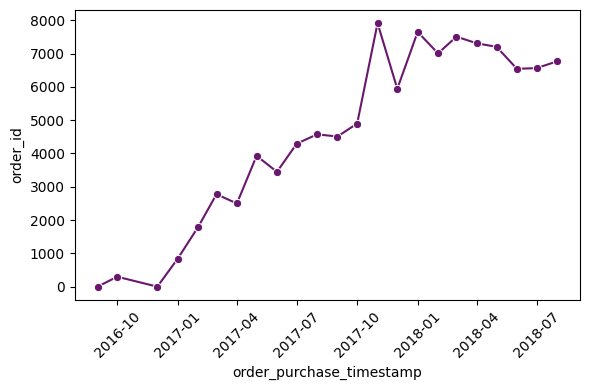

In [10]:
sv.lineplot_mensual(df, eje_x='order_purchase_timestamp', eje_y='order_id', agregacion='count')

* Los pedidos crecen de forma sostenida desde finales de 2016, alcanzando un máximo en noviembre de 2017 con alrededor de 8.000 pedidos. 

* El descenso brusco en septiembre de 2018 probablemente se debe a un mes con datos incompletos. Se observan picos estacionales vinculados a fechas 
  comerciales como el Día de los Niños o la campaña navideña.

### Total ventas mensuales:

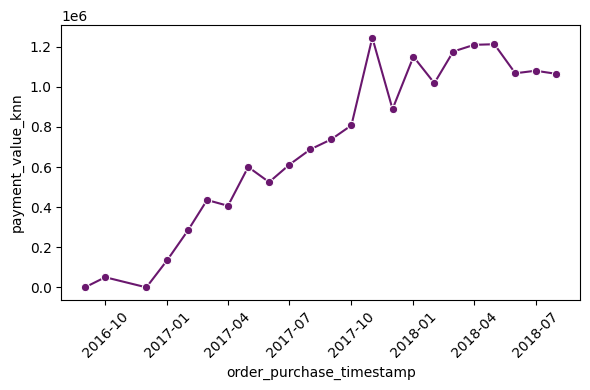

In [11]:
sv.lineplot_mensual(df, eje_x='order_purchase_timestamp', eje_y='payment_value_knn', agregacion='sum')

* Presentan un patrón paralelo al de los pedidos. El mayor volumen, cercano a R$1,2 millones, se registra en noviembre de 2017, confirmando su 
  importancia comercial.

###  Review score promedio por mes:

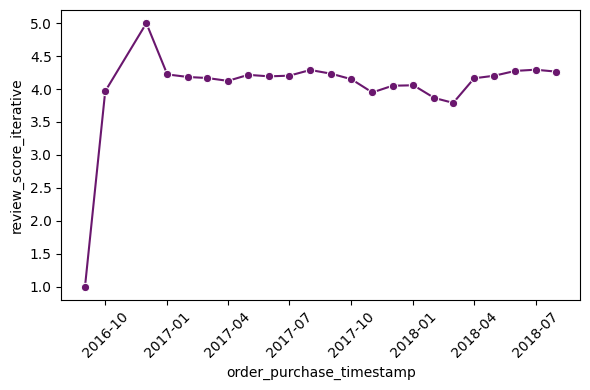

In [12]:
sv.lineplot_mensual(df, eje_x='order_purchase_timestamp', eje_y='review_score_iterative', agregacion='mean')

* La satisfacción se mantiene estable en valores entre 4 y 4,5. El pico de 5 estrellas en octubre de 2016 responde a un número reducido de pedidos  
  iniciales. La caída a 3,5 en enero de 2017 puede asociarse a retrasos tras la campaña navideña.

###  Tiempo de entrega promedio por mes:

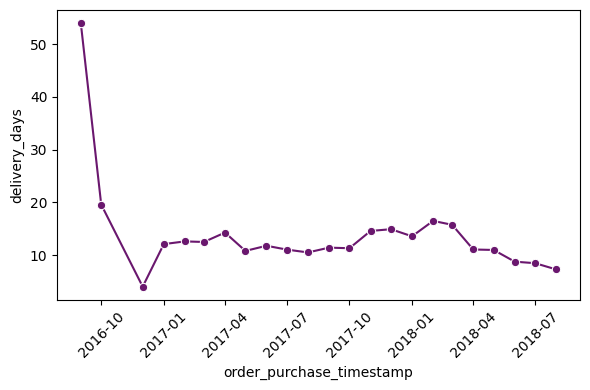

In [13]:
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
sv.lineplot_mensual(df, eje_x='order_purchase_timestamp', eje_y='delivery_days', agregacion='mean')
                       

* En octubre de 2016 se alcanza un máximo de 55 días, reflejando problemas logísticos en la fase inicial del marketplace. 

* En diciembre ya se había 
  reducido a 12 días y, durante 2017 y 2018, se mantuvo estable entre 10 y 15 días.

## Variable objetivo vs numéricas

In [14]:
col_num = 'review_score_iterative'
cols_num = ['payment_value_knn', 'delivery_days', 'price_knn']

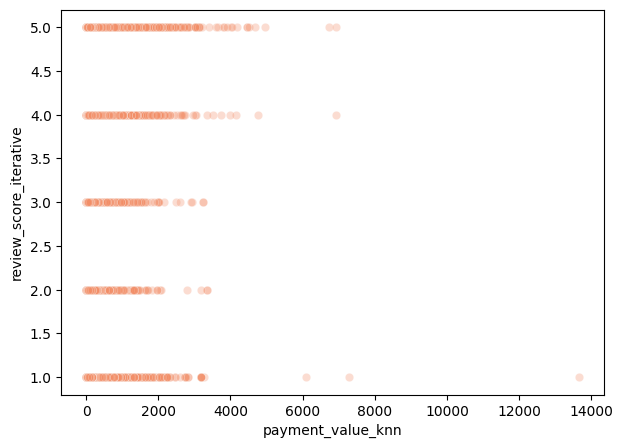

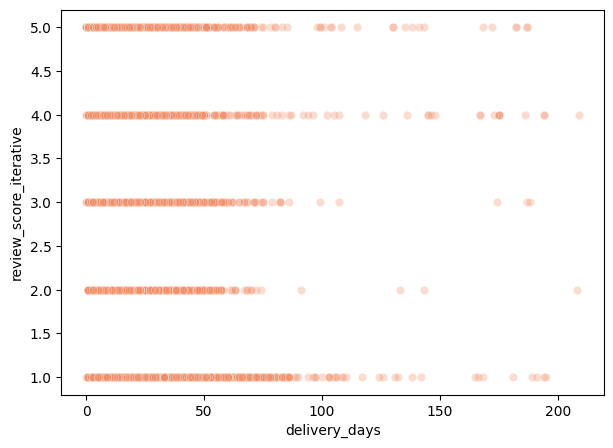

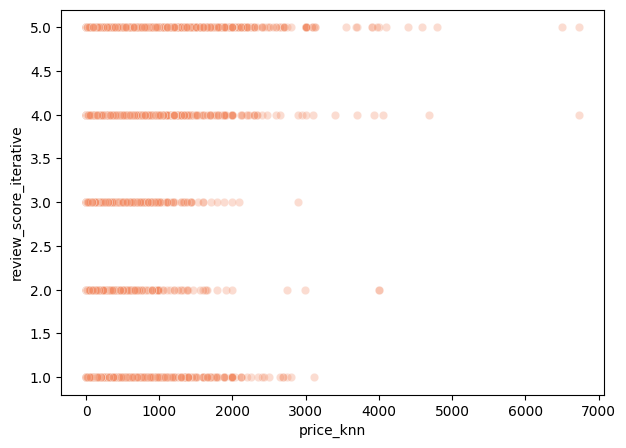

In [15]:
for col in cols_num:
    if col == col_num:
        continue
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x= col, y=col_num, color= '#F28E67', alpha= 0.3)
    #plt.yscale('log')
    plt.show()

* Pago total vs review score: No existe una relación directa entre cuánto paga el cliente y su satisfacción. Clientes que pagan importes muy distintos 
  ofrecen valoraciones similares.

* Días de entrega vs review score: Las entregas rápidas (menos de 20 días) suelen asociarse a valoraciones más altas, aunque entregas muy tardías también 
  pueden recibir calificaciones excelentes si el producto cumple las expectativas.

* Precio del producto vs review score: La ausencia de correlación muestra que los clientes ajustan sus expectativas al precio. Tanto productos económicos 
  como caros logran niveles similares de satisfacción.

## Variable objetivo vs categóricas

In [16]:
variables_relevantes = ['order_status',
 'payment_type',
 'customer_state',
 'seller_state',
 'product_category_name_english']

--------------------------------
Promedio de review_score_iterative por ORDER_STATUS
--------------------------------
order_status
delivered    4.12
canceled     2.43
Name: review_score_iterative, dtype: float64


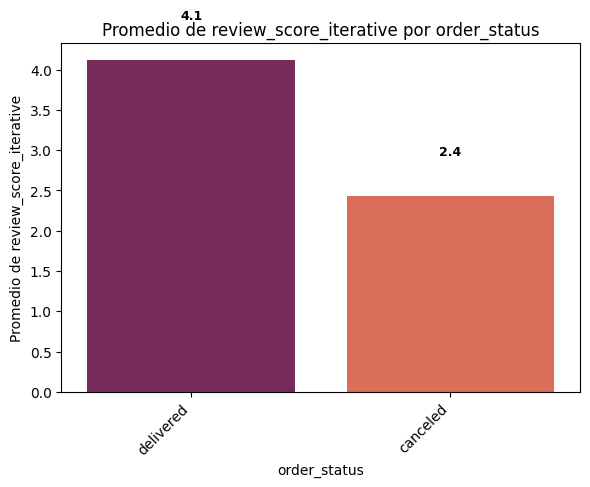

--------------------------------
Promedio de review_score_iterative por PAYMENT_TYPE
--------------------------------
payment_type
debit_card     4.21
bank_slip      4.13
credit_card    4.12
voucher        4.07
Name: review_score_iterative, dtype: float64


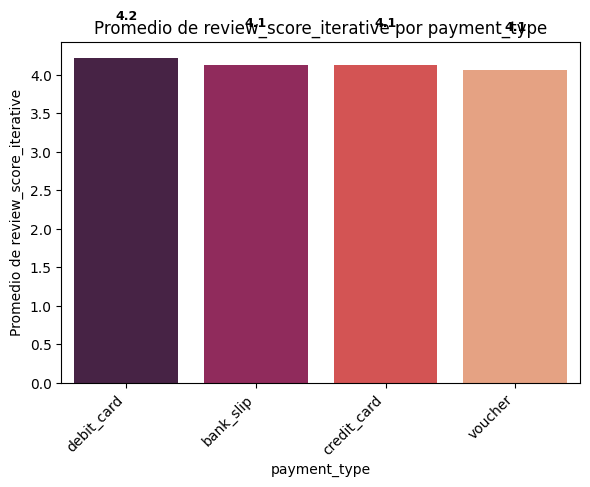

--------------------------------
Promedio de review_score_iterative por CUSTOMER_STATE
--------------------------------
customer_state
ap    4.23
sp    4.21
pr    4.20
am    4.20
mg    4.16
to    4.15
ms    4.15
ro    4.13
rs    4.13
rn    4.11
sc    4.10
df    4.09
mt    4.07
go    4.07
pe    4.06
ac    4.06
pb    4.05
es    4.03
rj    3.93
pi    3.93
ce    3.92
se    3.91
rr    3.90
ba    3.90
pa    3.89
al    3.83
ma    3.76
Name: review_score_iterative, dtype: float64


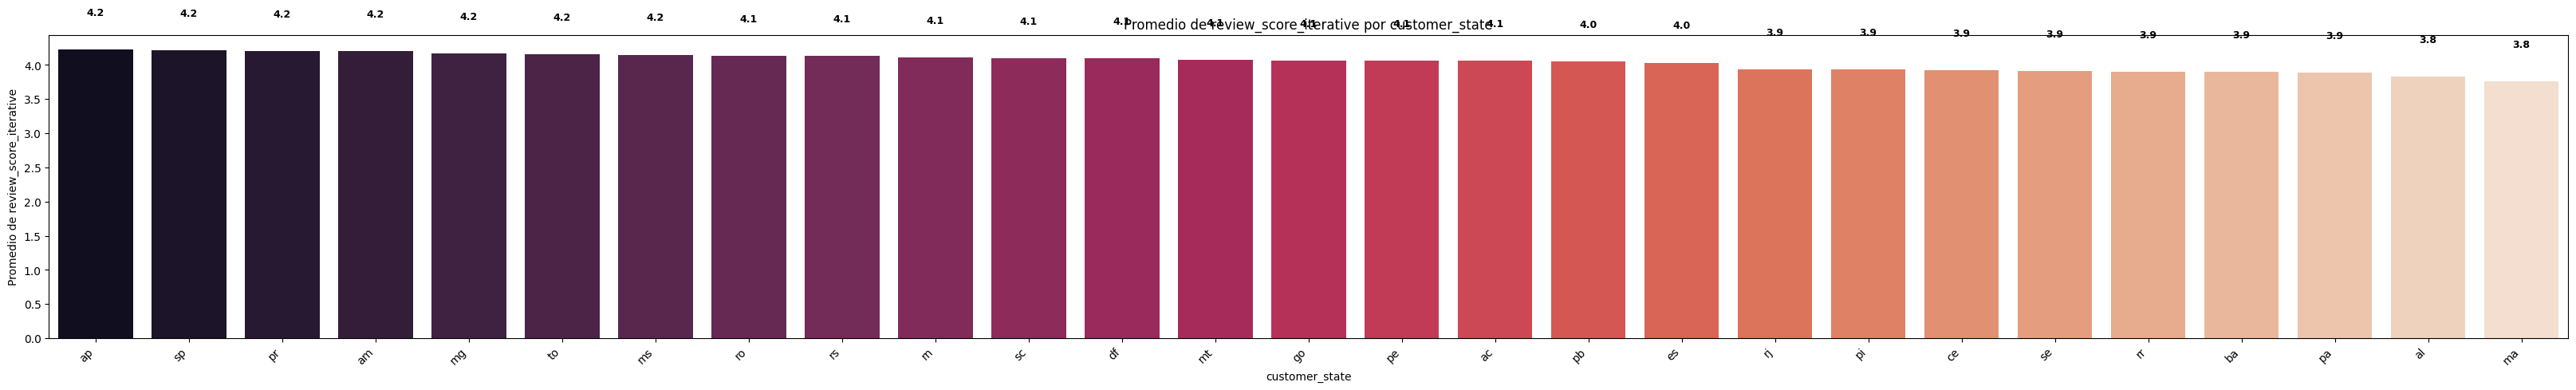

--------------------------------
Promedio de review_score_iterative por SELLER_STATE
--------------------------------
seller_state
pa    4.50
ms    4.46
pi    4.36
go    4.34
rn    4.31
rs    4.31
ce    4.29
pe    4.24
rj    4.21
mt    4.21
mg    4.21
ba    4.19
pr    4.16
sc    4.15
es    4.13
df    4.10
sp    4.09
ma    4.00
pb    3.93
ro    3.86
se    3.78
am    2.33
Name: review_score_iterative, dtype: float64


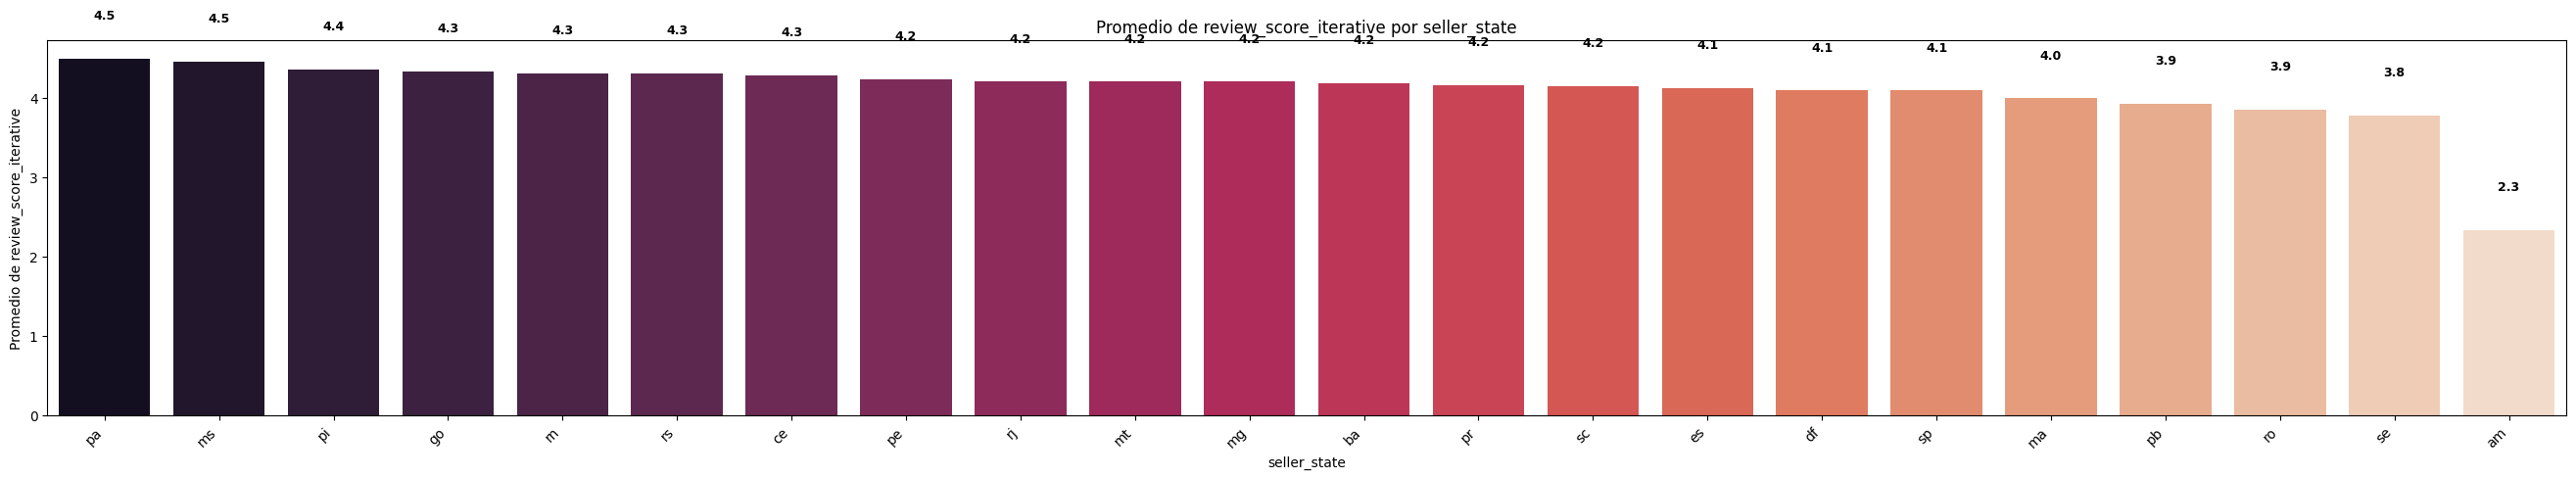

--------------------------------
Promedio de review_score_iterative por PRODUCT_CATEGORY_NAME_ENGLISH
--------------------------------
product_category_name_english
fashion_childrens_clothes                  5.00
cds_dvds_musicals                          4.67
books_imported                             4.52
books_general_interest                     4.50
food_drink                                 4.48
small_appliances_home_oven_and_coffee      4.45
books_technical                            4.41
fashion_sport                              4.38
costruction_tools_tools                    4.38
flowers                                    4.38
luggage_accessories                        4.34
la_cuisine                                 4.33
food                                       4.32
cine_photo                                 4.30
stationery                                 4.27
dvds_blu_ray                               4.26
fashion_shoes                              4.25
small_appliances   

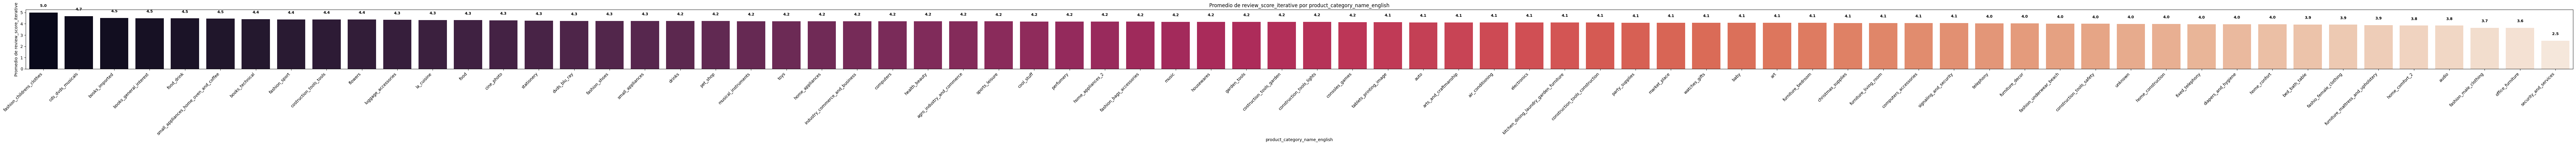

In [17]:
sv.objetivo_vs_categoricas(df, variables_relevantes, target='review_score_iterative')

* Estado del pedido: Los pedidos entregados obtienen un review promedio de 4,12. Los cancelados bajan a 2,43.

* Método de pago: Las diferencias son mínimas. El débito obtiene el valor más alto (4,21), seguido de bank slip, credit card y voucher.

* Ubicación del cliente: Amapá (4,23), São Paulo (4,21) y Paraná (4,20) presentan los valores más altos. Maranhão (3,76), Alagoas (3,83) y Pará (3,89)   
  muestran los más bajos, debido a mayores dificultades logísticas.

* Ubicación del vendedor: El efecto es menos acusado que en la ubicación del cliente. Pará destaca con 4,50 y Amazonas cae a 2,33.

* Categoría del producto: Los productos mejor valorados incluyen ropa infantil, CDs/DVDs o libros importados. Los peores, servicios de seguridad o 
  muebles de oficina. Los productos pequeños y estandarizados tienden a generar más satisfacción.

## Reflexiones generales

* Los resultados muestran que la satisfacción del cliente depende sobre todo de la logística y del tipo de producto, más que del precio o del método de 
  pago. 

* Los clientes brasileños toleran entregas relativamente largas si reciben el producto esperado. 

* Regiones del norte y nordeste representan una oportunidad clara de mejora logística. 

* También se observa que categorías pequeñas pueden ofrecer niveles de satisfacción muy altos. 

* La estabilidad del review score incluso en periodos de crecimiento confirma la capacidad de Olist para escalar manteniendo la calidad del 
  servicio.

## Siguientes pasos

* Los resultados del análisis exploratorio permiten plantear varias líneas de investigación que aportarían valor estratégico a Olist. Una de ellas sería 
  profundizar en las diferencias regionales del país. Comparar el norte y el sur en aspectos como tiempos de entrega, costos logísticos, categorías predominantes y niveles de satisfacción ayudaría a diseñar estrategias específicas para mejorar el servicio en estados con menor infraestructura o menor actividad comercial.

* Otro enfoque relevante sería analizar con mayor detalle las categorías de productos. Esto permitiría identificar qué variables —precio, peso, tiempos 
  de envío o tipo de vendedor influyen más en la satisfacción dentro de cada categoría. Por ejemplo, comprender por qué los productos de mobiliario reciben valoraciones más bajas permitiría detectar si el problema está en los plazos, en los daños durante el transporte o en las expectativas del cliente.

* Un estudio comparativo entre los vendedores con mejor y peor desempeño permitiría identificar patrones comunes: ubicación, tipos de productos, rapidez 
  de entrega, calidad de las descripciones o número de fotos. Extraer las prácticas que funcionan permitiría crear guías y recomendaciones que mejoren el rendimiento general de la plataforma.

* En conjunto, estos análisis complementarios permitirían transformar los hallazgos actuales en acciones concretas orientadas a mejorar tanto la 
  satisfacción del cliente como la eficiencia operativa del marketplace.

## Resumen

* El análisis realizado sobre los datos de Olist muestra patrones consistentes en su operativa y en el comportamiento del mercado. Se trabajó con 104.243 
  pedidos finalizados, tras excluir 2.341 registros sin fecha de entrega (2,2% del conjunto original). De los pedidos válidos, el 99,99% llegó correctamente a su destino, lo que confirma un sistema logístico altamente eficiente. Las cancelaciones son prácticamente inexistentes (solo aparecen siete casos), lo que apunta a controles sólidos durante todo el proceso de compra.

* En cuanto a los métodos de pago, la tarjeta de crédito es la opción predominante (74,5%), seguida por el boleto bancario (19,1%). Este reparto refleja 
  una preferencia clara por sistemas de pago flexibles y ampliamente adoptados en Brasil.

* La distribución territorial de clientes y vendedores muestra una fuerte concentración en el sudeste del país. São Paulo destaca especialmente: 
  concentra más del 42% de los clientes y más del 71% de los vendedores. Esta situación responde tanto a la densidad poblacional como al mayor poder adquisitivo de la región, pero también deja entrever la necesidad de reforzar la presencia logística en áreas menos atendidas.

* El catálogo de productos es amplio. Hogar, salud y belleza, y deportes figuran entre las categorías con mayor volumen, mientras que segmentos más  
  pequeños (como CDs o ropa infantil) registran niveles de satisfacción elevados pese a su escaso peso en las ventas. En términos de precios, predominan los productos accesibles, aunque también aparecen artículos premium y productos muy pesados que incrementan los costes logísticos.

* La financiación es habitual, aunque en niveles moderados, y la satisfacción del cliente se mantiene alta: el 58,1% de las valoraciones corresponden a 
  cinco estrellas, independientemente del precio del producto o del número de cuotas elegidas.

* El análisis de correlaciones confirma que el precio y el peso afectan directamente a los costes de envío y al importe final pagado. En cambio, 
  variables como la cantidad de fotos o la extensión de las descripciones no muestran relación con la satisfacción del cliente, lo que sugiere que la experiencia de compra y la calidad del servicio pesan más que la presentación visual o textual.

* El mapa geográfico de ventas refuerza la idea de que el comercio electrónico se concentra en el sudeste del país. A la vez, identifica zonas con baja 
  penetración y mercados intermedios con margen de crecimiento, donde una mejora en la infraestructura logística podría generar un impacto significativo. También refleja que un mayor volumen de ventas no garantiza mejores valoraciones, destacando el papel decisivo de la logística en la experiencia final del cliente.

* En conjunto, estos resultados ofrecen a Olist una base sólida para optimizar procesos, orientar estrategias de expansión y ajustar acciones de 
  marketing y distribución en función del potencial real de cada región.

### Exportación a Excel

In [ ]:
# Columnas a mantener para el dashboard
columnas_dashboard = [
    # Temporal
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    
    # Satisfacción
    'review_score_iterative',
    'order_status',
    
    # Productos
    'product_category_name_english',
    'price_knn',
    'product_weight_g_knn',
    
    # Geografía
    'customer_state',
    'seller_state',
    
    # Ventas/Pago
    'payment_value_knn',
    'freight_value_knn',
    'payment_type',
    'payment_installments_iterative',
    
    # Calculada
    'delivery_days'
]


df_dashboard = df[columnas_dashboard].copy()
df_dashboard.to_excel('../datos/olist_dashboard.xlsx', index=False)

print(f"Columnas originales: {len(df.columns)}")
print(f"Columnas exportadas: {len(df_dashboard.columns)}")
print(f"Columnas eliminadas: {len(df.columns) - len(df_dashboard.columns)}")
print(f"Registros: {len(df_dashboard)}")

Columnas originales: 28
Columnas exportadas: 14
Columnas eliminadas: 14
Registros: 104243
